<a href="https://colab.research.google.com/github/KodumuruRaja/Regression-Algorithms/blob/main/Multiple-Linear-Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
data=pd.read_csv("/content/50_Startups.csv")

In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data.shape

(50, 5)

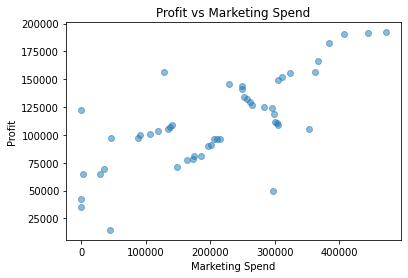

In [ ]:
plt.scatter(data['Marketing Spend'],data['Profit'],alpha=0.5)
plt.title('Profit vs Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

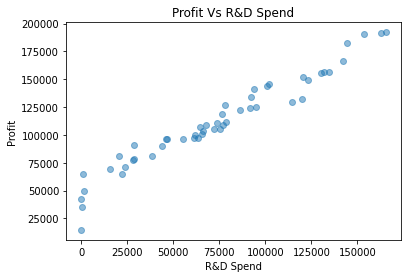

In [ ]:
plt.scatter(data['R&D Spend'],data['Profit'],alpha=0.5)
plt.title('Profit Vs R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

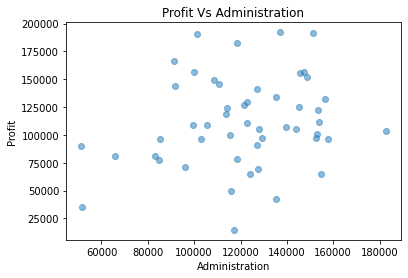

In [ ]:
plt.scatter(data['Administration'],data['Profit'],alpha=0.5)
plt.title('Profit Vs Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

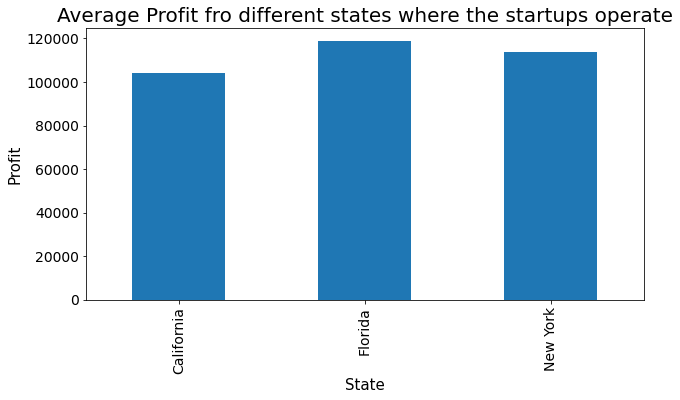

In [ ]:
ax=data.groupby(['State'])['Profit'].mean().plot.bar(
    figsize=(10,5),
    fontsize=14
)
ax.set_title("Average Profit fro different states where the startups operate",fontsize=20)
ax.set_xlabel("State",fontsize=15)
ax.set_ylabel("Profit",fontsize=15)

In [ ]:
data.State.value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [ ]:
# create dummy variables for categorical variables
data['NewYork_State']=np.where(data['State']=='New York',1,0)
data['California_State']=np.where(data['State']=='California',1,0)
data['Florida_State']=np.where(data['State']=='Florida',1,0)

In [ ]:
# drop the original columns
data.drop('State',axis=1,inplace=True)

In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [ ]:
dep_var='Profit'
ind_var=data.columns.tolist()
ind_var.remove(dep_var)

In [ ]:
ind_var

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'NewYork_State',
 'California_State',
 'Florida_State']

In [ ]:
x=data[ind_var].values
y=data[dep_var].values

In [ ]:
x.shape,y.shape

((50, 6), (50,))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
# Transforming the data
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
# fitting Multiple Linear Regression to the Training Data
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=reg.predict(x_test)

In [ ]:
math.sqrt(mean_squared_error(y_test,y_pred))

15023.010725678325

In [ ]:
r2_score(y_test,y_pred)

0.8235262062096438